In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing the libraries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("c:/users/arkaj/desktop"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', '1613112047_Siddhant Saurabh_FinalProjectReport - siddhant saurabh.pdf', '7th sem 2022 guideline for project report preparation.docx', 'AAPL - Main.ipynb', 'AAPL - Raw.ipynb', 'AAPL.csv', 'AB.txt', 'analyze-uniqlo-stock.ipynb', 'Arkajyoti Bhattacharyay CV.pdf', 'Arnab Dey_Report_10211219010 (1).pdf', 'Avik_Banik-10211219013.pdf', 'CC DecTree.ipynb', 'CC KNN.ipynb', 'CC LogReg.ipynb', 'CC NB.ipynb', 'CC RF.ipynb', 'Cloud Computing', 'Cyber security', 'desktop.ini', 'Files', 'HSMC 701', 'Huge Stock', 'huge-stock-market-dataset.ipynb', 'imdb_classification_rnn.ipynb', 'istanbul-stock', 'istanbul-stock-prediction-lstm.ipynb', 'istanbul_stock_exchange.csv', 'List.ipynb', 'Literature survey Stock market LSTM.pdf', 'LSTM.ipynb', 'Machine learning', 'Made Easy Offline Mock Tests Paper.pdf', 'Multimedia', 'Netflix.csv', 'Netflix.ipynb', 'Pannel 1.xlsx', 'Program problems', 'Project Presentation.pptx', 'Project Report.docx', 'projects2021C9.pdf', 'SampleReport.docx', 'save

In [2]:
# Importing the training set
dataset_train = pd.read_csv('c:/users/arkaj/desktop/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [4]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[42120],
       [43000],
       [43940],
       ...,
       [13990],
       [13720],
       [14050]], dtype=int64)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled.shape

(1226, 1)

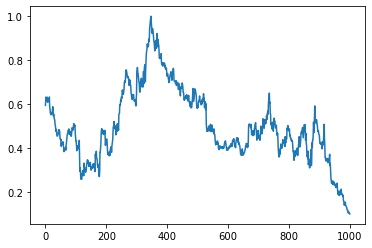

In [6]:
# train part
N = 1000
plt.plot(train_scaled[:N])
plt.show()

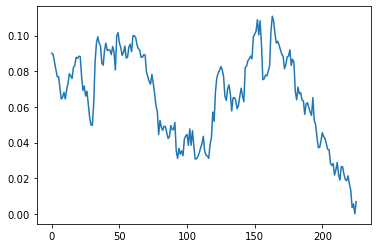

In [7]:
# we are going to predict the last 1226-N values 
plt.plot(train_scaled[N:])
plt.show()

In [8]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, N):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (950, 50)
y_train shape:  (950,)


In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (950, 50, 1)
y_train shape:  (950,)


### Create LSTM Model

In [12]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# model
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, 1), return_sequences=True)) # 128 lstm neuron(block)
model.add(LSTM(64, return_sequences=True)) # 64 lstm neuron(block)
model.add(Dropout(0.2))
model.add(LSTM(32)) # 128 lstm neuron(block)
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=250, batch_size=32)

Epoch 1/250
30/30 [==============================] - 6s 57ms/step - loss: 0.0151
Epoch 2/250
30/30 [==============================] - 1s 50ms/step - loss: 0.0050
Epoch 3/250
30/30 [==============================] - 1s 48ms/step - loss: 0.0039
Epoch 4/250
30/30 [==============================] - 2s 51ms/step - loss: 0.0033
Epoch 5/250
30/30 [==============================] - 1s 49ms/step - loss: 0.0029
Epoch 6/250
30/30 [==============================] - 1s 44ms/step - loss: 0.0028
Epoch 7/250
30/30 [==============================] - 1s 44ms/step - loss: 0.0024
Epoch 8/250
30/30 [==============================] - 1s 45ms/step - loss: 0.0024
Epoch 9/250
30/30 [==============================] - 1s 44ms/step - loss: 0.0021
Epoch 10/250
30/30 [==============================] - 1s 44ms/step - loss: 0.0019
Epoch 11/250
30/30 [==============================] - 1s 46ms/step - loss: 0.0018
Epoch 12/250
30/30 [==============================] - 1s 45ms/step - loss: 0.0017
Epoch 13/250
30/30 [=====

30/30 [==============================] - 1s 46ms/step - loss: 6.3889e-04
Epoch 98/250
30/30 [==============================] - 1s 47ms/step - loss: 6.2836e-04
Epoch 99/250
30/30 [==============================] - 1s 47ms/step - loss: 6.3601e-04
Epoch 100/250
30/30 [==============================] - 1s 47ms/step - loss: 6.3481e-04
Epoch 101/250
30/30 [==============================] - 1s 47ms/step - loss: 6.4034e-04
Epoch 102/250
30/30 [==============================] - 1s 47ms/step - loss: 5.9316e-04
Epoch 103/250
30/30 [==============================] - 1s 47ms/step - loss: 6.7905e-04
Epoch 104/250
30/30 [==============================] - 2s 55ms/step - loss: 6.3940e-04
Epoch 105/250
30/30 [==============================] - 2s 51ms/step - loss: 6.0263e-04
Epoch 106/250
30/30 [==============================] - 2s 64ms/step - loss: 6.1899e-04
Epoch 107/250
30/30 [==============================] - 2s 54ms/step - loss: 6.8978e-04
Epoch 108/250
30/30 [==============================] - 1s 4

30/30 [==============================] - 2s 50ms/step - loss: 5.6152e-04
Epoch 192/250
30/30 [==============================] - 2s 51ms/step - loss: 5.7113e-04
Epoch 193/250
30/30 [==============================] - 1s 47ms/step - loss: 5.5849e-04
Epoch 194/250
30/30 [==============================] - 1s 46ms/step - loss: 5.7340e-04
Epoch 195/250
30/30 [==============================] - 1s 45ms/step - loss: 6.0472e-04
Epoch 196/250
30/30 [==============================] - 1s 45ms/step - loss: 5.8056e-04
Epoch 197/250
30/30 [==============================] - 1s 49ms/step - loss: 6.0806e-04
Epoch 198/250
30/30 [==============================] - 1s 47ms/step - loss: 5.6615e-04
Epoch 199/250
30/30 [==============================] - 1s 46ms/step - loss: 6.7408e-04
Epoch 200/250
30/30 [==============================] - 1s 48ms/step - loss: 5.7308e-04
Epoch 201/250
30/30 [==============================] - 1s 47ms/step - loss: 6.3356e-04
Epoch 202/250
30/30 [==============================] - 1s

<a id="33"></a>
### Predictions and Visualising RNN Model

In [14]:
predicted_stock_price = []

#1
X_test = X_train[(N-51),:] # the last 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (1, X_test.shape[0], X_test.shape[1]))
a = model.predict(X_test)
predicted_stock_price = np.append(predicted_stock_price, a)
X_test = np.append(X_test, predicted_stock_price) 
X_test

1/1 [==============================] - 1s 918ms/step


array([0.23123563, 0.22935396, 0.23374451, 0.23081748, 0.21931842,
       0.23478988, 0.2314447 , 0.22140916, 0.2393895 , 0.22245453,
       0.2059377 , 0.19506586, 0.1875392 , 0.20196529, 0.19506586,
       0.18293958, 0.18670291, 0.18942087, 0.20426511, 0.19903826,
       0.18774828, 0.20259252, 0.21200084, 0.18962994, 0.18983901,
       0.18586661, 0.1875392 , 0.18043069, 0.1835668 , 0.16224127,
       0.15847794, 0.14990592, 0.13861593, 0.1436337 , 0.14802425,
       0.15304202, 0.14405185, 0.13798871, 0.13255279, 0.1308802 ,
       0.12711687, 0.11791762, 0.11645411, 0.11540874, 0.11457244,
       0.10390968, 0.1093456 , 0.10620949, 0.10202802, 0.0997282 ,
       0.1055297 ])

In [15]:
#2-7
for i in range(1,(1226-N)):
    X_test = X_test[1:51]
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (1, 50, 1))
    a = model.predict(X_test)
    predicted_stock_price = np.append(predicted_stock_price, a)  
    X_test = np.append(X_test, predicted_stock_price[i])

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


In [16]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1,1))
predicted_stock_price.shape

(226, 1)

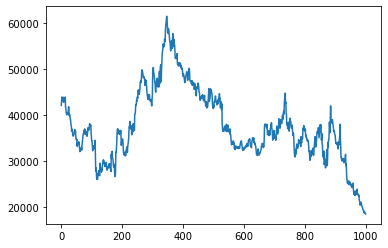

In [17]:
# train part
plt.plot(train[:N])
plt.show()

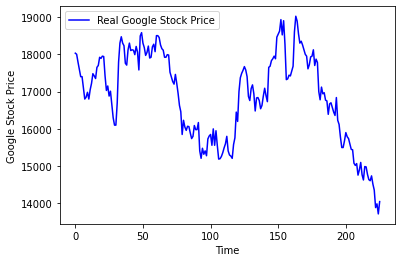

In [18]:
# we are going to predict 
plt.plot(train[N:], color = 'blue', label = 'Real Google Stock Price')
#plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

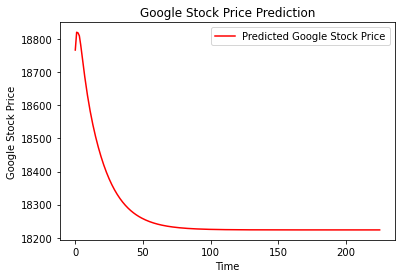

In [19]:
# Visualising the results
# plt.plot(train[1216:].reshape(-1,1), color = 'blue', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()